<a href="https://colab.research.google.com/github/InezaRW/InezaRW/blob/main/Multi_Hazard_Rwanda_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Libraries Used

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Data Used

In [44]:
data = '/content/Multi_Hazard_Rwanda_2021.csv'
df = pd.read_csv(data)
df.head()

,Province,District,Hazard,Death_2021,Damaged_House_2021
0,Kigali,Gasabo,Flood,7,5
1,Kigali,Gasabo,Landslide,12,8
2,Kigali,Gasabo,Rainstorm,2,149
3,Kigali,Gasabo,Windstom,0,13
4,Kigali,Gasabo,Lightenin,3,3


#Data Description

In [45]:
print(df.describe())

       Death_2021  Damaged_House_2021
count  150.000000          150.000000
mean     2.173333           54.840000
std      4.301938          139.428897
min      0.000000            0.000000
25%      0.000000            0.000000
50%      1.000000            5.000000
75%      2.000000           46.000000
max     28.000000         1169.000000


#Checking for missing

In [46]:
print(df.isnull().sum())

Province              0
District              0
Hazard                0
Death_2021            0
Damaged_House_2021    0
dtype: int64


#Visualisation

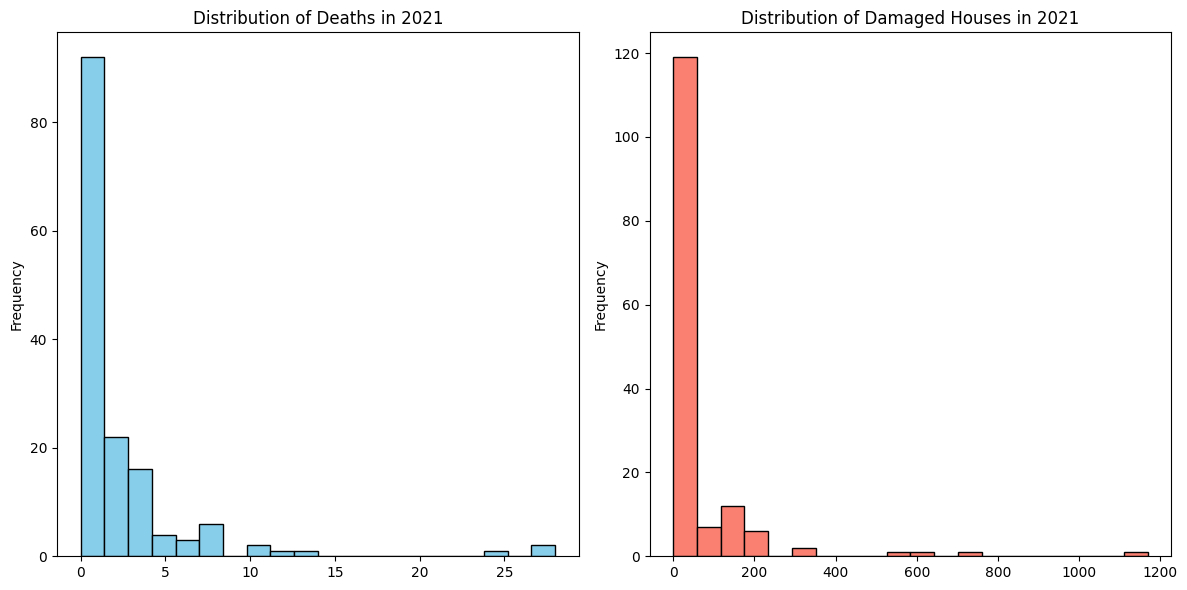

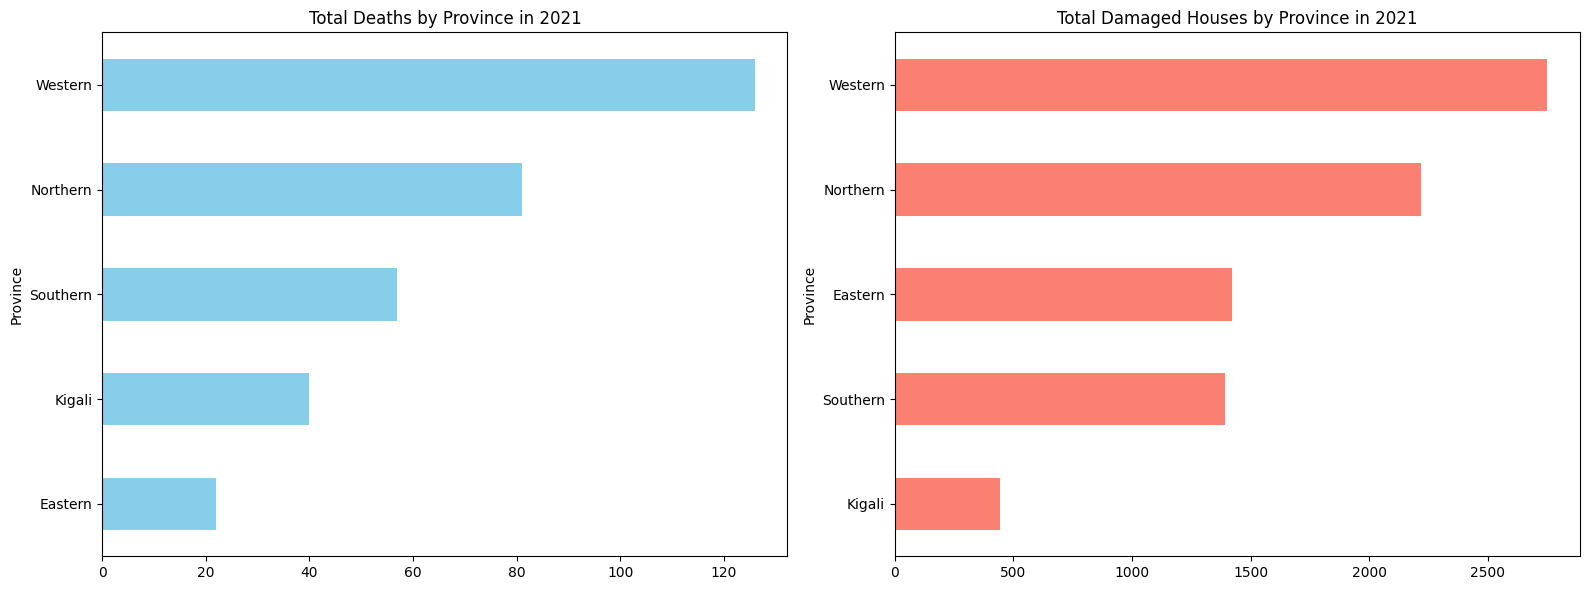

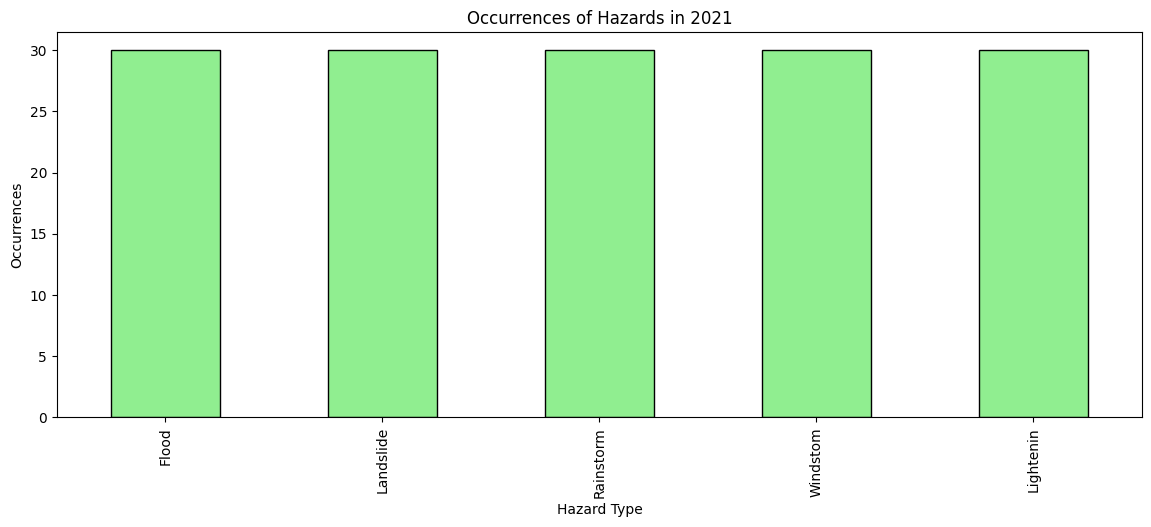

In [47]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
df['Death_2021'].plot(kind='hist', bins=20, edgecolor='black', color='skyblue')
plt.title('Distribution of Deaths in 2021')

plt.subplot(1, 2, 2)
df['Damaged_House_2021'].plot(kind='hist', bins=20, edgecolor='black', color='salmon')
plt.title('Distribution of Damaged Houses in 2021')

plt.tight_layout()
plt.show()

# Explore regional variations
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
df.groupby('Province')['Death_2021'].sum().sort_values().plot(kind='barh', color='skyblue')
plt.title('Total Deaths by Province in 2021')

plt.subplot(1, 2, 2)
df.groupby('Province')['Damaged_House_2021'].sum().sort_values().plot(kind='barh', color='salmon')
plt.title('Total Damaged Houses by Province in 2021')

plt.tight_layout()
plt.show()

# Explore hazard occurrences
plt.figure(figsize=(14, 5))
df['Hazard'].value_counts().plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Occurrences of Hazards in 2021')
plt.xlabel('Hazard Type')
plt.ylabel('Occurrences')
plt.show()

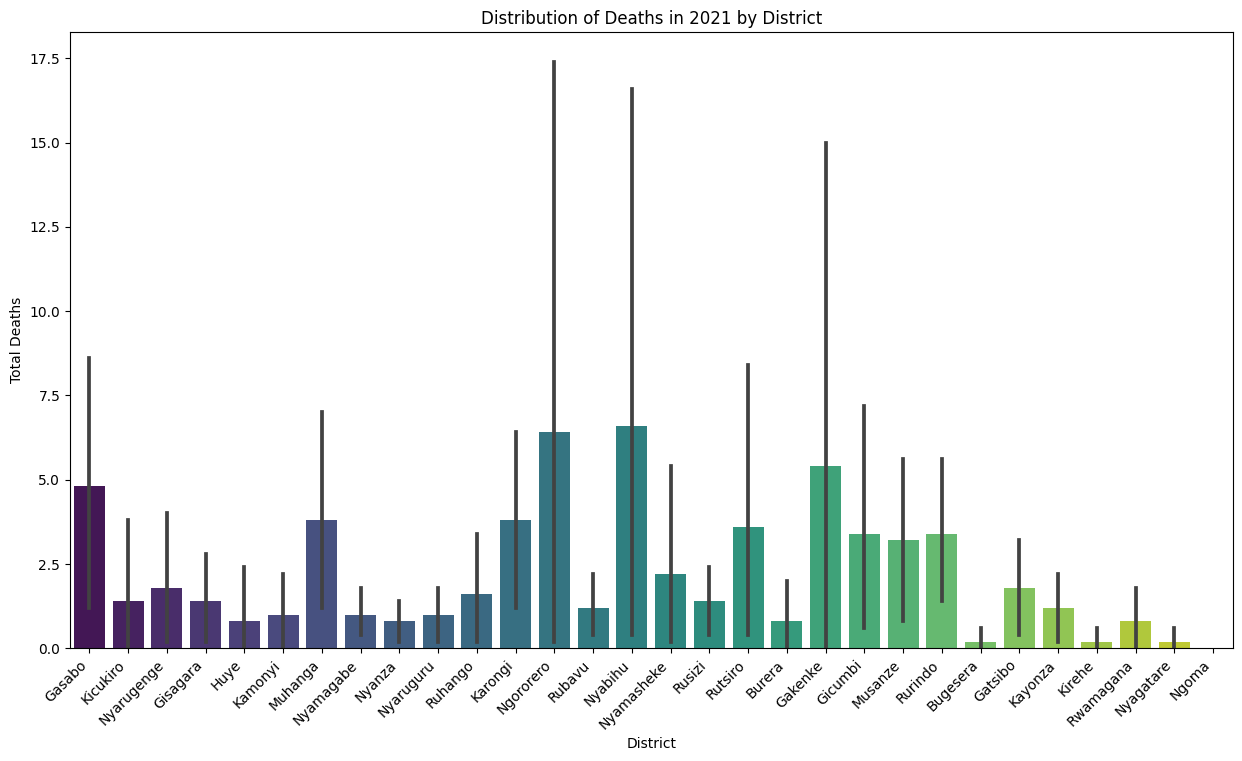

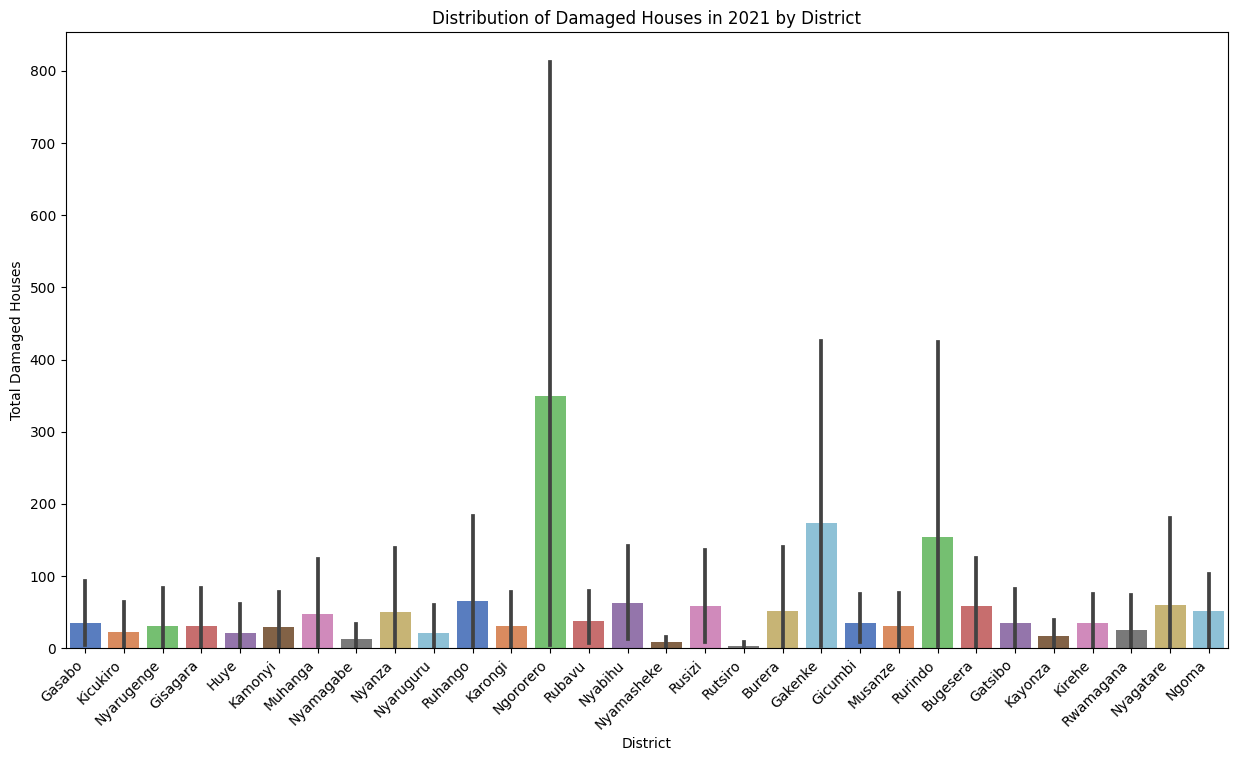

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the matplotlib figure
plt.figure(figsize=(15, 8))

# Plot deaths
sns.barplot(x='District', y='Death_2021', data=df, palette='viridis')
plt.title('Distribution of Deaths in 2021 by District')
plt.xlabel('District')
plt.ylabel('Total Deaths')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.show()

# Set up the matplotlib figure
plt.figure(figsize=(15, 8))

# Plot damaged houses
sns.barplot(x='District', y='Damaged_House_2021', data=df, palette='muted')
plt.title('Distribution of Damaged Houses in 2021 by District')
plt.xlabel('District')
plt.ylabel('Total Damaged Houses')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.show()


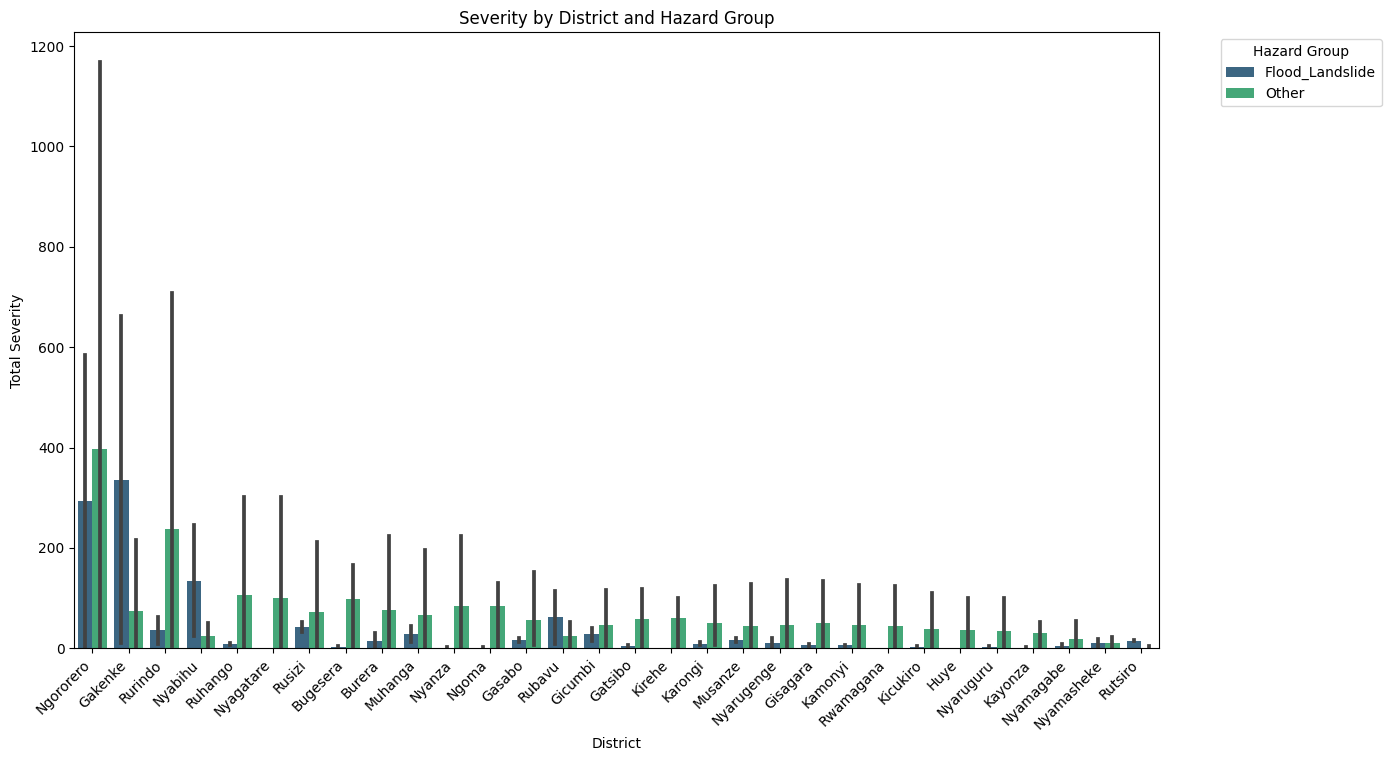

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = '/content/Multi_Hazard_Rwanda_2021.csv'
df = pd.read_csv(data)

# Calculate severity and likelihood for each district
# For simplicity, let's use the sum of 'Death_2021' and 'Damaged_House_2021' as severity
# and the count of hazards as likelihood
df['Severity'] = df['Death_2021'] + df['Damaged_House_2021']
df['Likelihood'] = df.groupby('District')['Hazard'].transform('count')

# Group districts based on hazard types
flood_landslide_group = ['Flood', 'Landslide']
lightning_group = ['Lightning']
other_group = ['Rainstorm', 'Windstom']  # Assuming the remaining hazards fall into this group

# Assign groups based on hazard types
df['Group'] = np.where(df['Hazard'].isin(flood_landslide_group), 'Flood_Landslide',
                       np.where(df['Hazard'].isin(lightning_group), 'Lightning', 'Other'))

# Prioritize groups based on total severity
group_prioritization = df.groupby('Group')['Severity'].sum().sort_values(ascending=False).index

# Plotting
plt.figure(figsize=(14, 8))
sns.barplot(x='District', y='Severity', hue='Group', data=df, palette='viridis', order=df.groupby('District')['Severity'].sum().sort_values(ascending=False).index)
plt.title('Severity by District and Hazard Group')
plt.xlabel('District')
plt.ylabel('Total Severity')
plt.legend(title='Hazard Group', bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.show()


Original Data:
  Province District     Hazard  Death_2021  Damaged_House_2021
0   Kigali   Gasabo      Flood           7                   5
1   Kigali   Gasabo  Landslide          12                   8
2   Kigali   Gasabo  Rainstorm           2                 149
3   Kigali   Gasabo   Windstom           0                  13
4   Kigali   Gasabo  Lightenin           3                   3

Calculated Severity and Likelihood:
    District     Hazard  Severity  Likelihood
0     Gasabo      Flood        12           5
1     Gasabo  Landslide        20           5
2     Gasabo  Rainstorm       151           5
3     Gasabo   Windstom        13           5
4     Gasabo  Lightenin         6           5
..       ...        ...       ...         ...
145    Ngoma      Flood         0           5
146    Ngoma  Landslide         3           5
147    Ngoma  Rainstorm       122           5
148    Ngoma   Windstom       131           5
149    Ngoma  Lightenin         0           5

[150 rows x 4 col

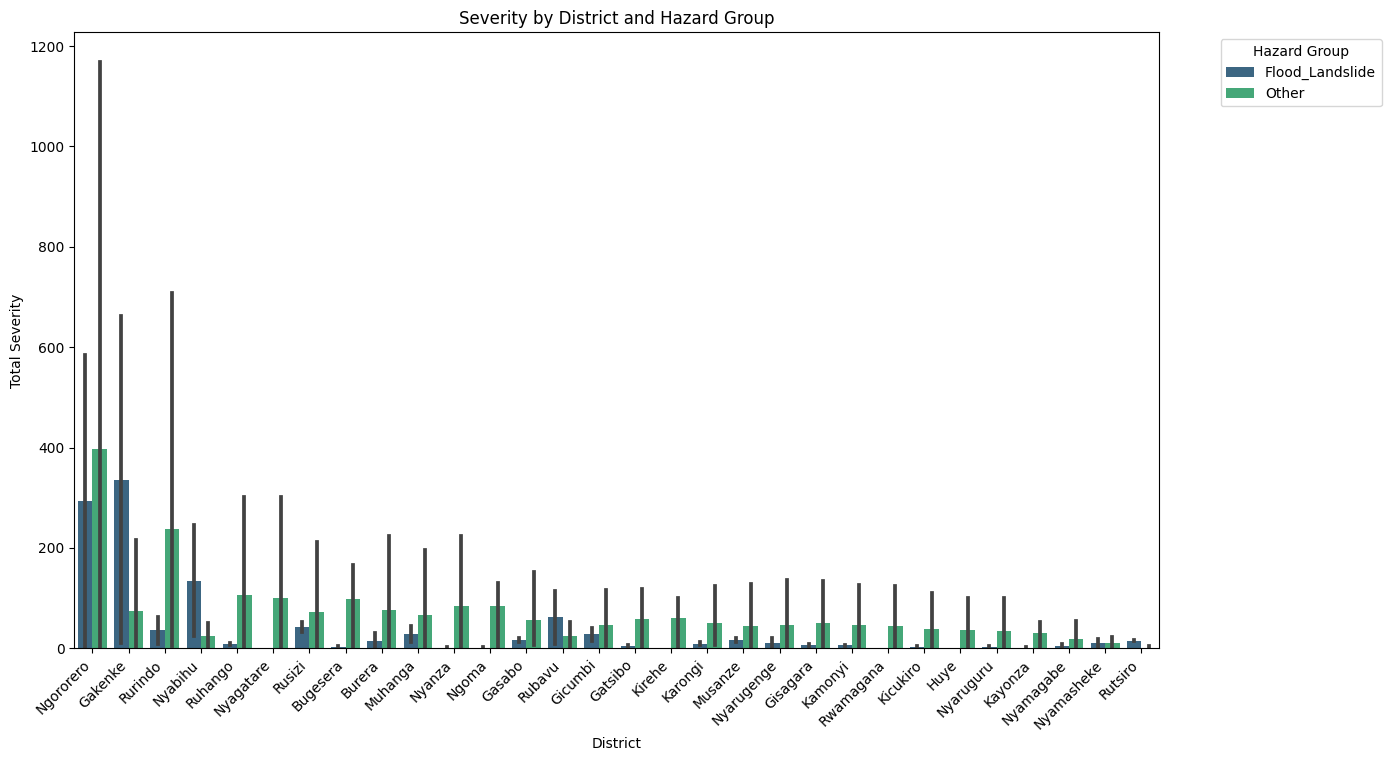

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = '/content/Multi_Hazard_Rwanda_2021.csv'
df = pd.read_csv(data)

# Display the original data
print("Original Data:")
print(df.head())

# Calculate severity and likelihood for each district
# For simplicity, let's use the sum of 'Death_2021' and 'Damaged_House_2021' as severity
# and the count of hazards as likelihood
df['Severity'] = df['Death_2021'] + df['Damaged_House_2021']
df['Likelihood'] = df.groupby('District')['Hazard'].transform('count')

# Display the calculated severity and likelihood
print("\nCalculated Severity and Likelihood:")
print(df[['District', 'Hazard', 'Severity', 'Likelihood']])

# Group districts based on hazard types
flood_landslide_group = ['Flood', 'Landslide']
lightning_group = ['Lightning']
other_group = ['Rainstorm', 'Windstom']  # Assuming the remaining hazards fall into this group

# Assign groups based on hazard types
df['Group'] = np.where(df['Hazard'].isin(flood_landslide_group), 'Flood_Landslide',
                       np.where(df['Hazard'].isin(lightning_group), 'Lightning', 'Other'))

# Display the assigned groups
print("\nAssigned Groups:")
print(df[['District', 'Hazard', 'Group']])

# Prioritize groups based on total severity
group_prioritization = df.groupby('Group')['Severity'].sum().sort_values(ascending=False).index

# Display the prioritized groups
print("\nPrioritized Groups:")
print(group_prioritization)

# Plotting
plt.figure(figsize=(14, 8))
sns.barplot(x='District', y='Severity', hue='Group', data=df, palette='viridis', order=df.groupby('District')['Severity'].sum().sort_values(ascending=False).index)
plt.title('Severity by District and Hazard Group')
plt.xlabel('District')
plt.ylabel('Total Severity')
plt.legend(title='Hazard Group', bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.show()


Original Data:
  Province District     Hazard  Death_2021  Damaged_House_2021
0   Kigali   Gasabo      Flood           7                   5
1   Kigali   Gasabo  Landslide          12                   8
2   Kigali   Gasabo  Rainstorm           2                 149
3   Kigali   Gasabo   Windstom           0                  13
4   Kigali   Gasabo  Lightenin           3                   3

Calculated Severity and Likelihood:
    District     Hazard  Severity  Likelihood
0     Gasabo      Flood        12           5
1     Gasabo  Landslide        20           5
2     Gasabo  Rainstorm       151           5
3     Gasabo   Windstom        13           5
4     Gasabo  Lightenin         6           5
..       ...        ...       ...         ...
145    Ngoma      Flood         0           5
146    Ngoma  Landslide         3           5
147    Ngoma  Rainstorm       122           5
148    Ngoma   Windstom       131           5
149    Ngoma  Lightenin         0           5

[150 rows x 4 col

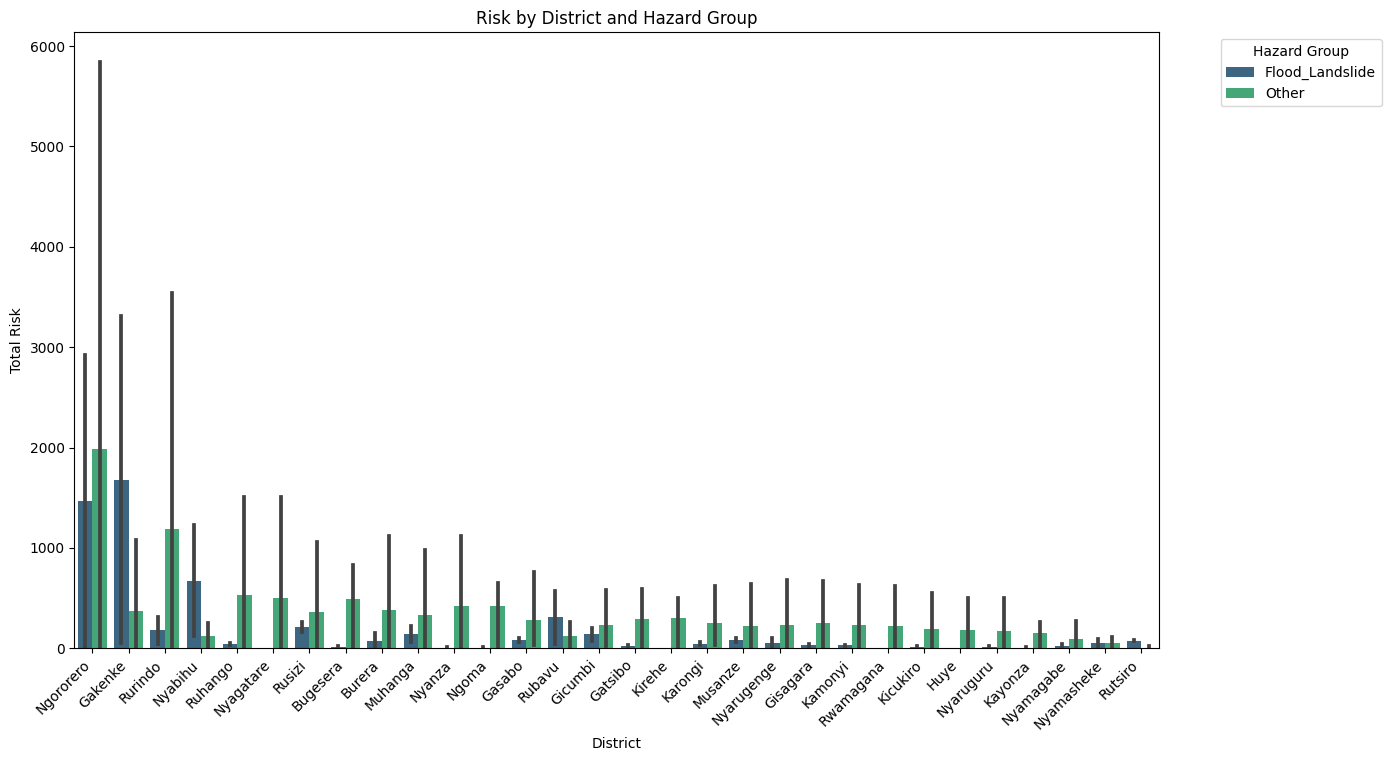

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = '/content/Multi_Hazard_Rwanda_2021.csv'
df = pd.read_csv(data)

# Display the original data
print("Original Data:")
print(df.head())

# Calculate severity and likelihood for each district
# For simplicity, let's use the sum of 'Death_2021' and 'Damaged_House_2021' as severity
# and the count of hazards as likelihood
df['Severity'] = df['Death_2021'] + df['Damaged_House_2021']
df['Likelihood'] = df.groupby('District')['Hazard'].transform('count')

# Display the calculated severity and likelihood
print("\nCalculated Severity and Likelihood:")
print(df[['District', 'Hazard', 'Severity', 'Likelihood']])

# Group districts based on hazard types
flood_landslide_group = ['Flood', 'Landslide']
lightning_group = ['Lightning']
other_group = ['Rainstorm', 'Windstom']  # Assuming the remaining hazards fall into this group

# Assign groups based on hazard types
df['Group'] = np.where(df['Hazard'].isin(flood_landslide_group), 'Flood_Landslide',
                       np.where(df['Hazard'].isin(lightning_group), 'Lightning', 'Other'))

# Display the assigned groups
print("\nAssigned Groups:")
print(df[['District', 'Hazard', 'Group']])

# Calculate risk as the product of severity and likelihood
df['Risk'] = df['Severity'] * df['Likelihood']

# Display the calculated risk
print("\nCalculated Risk:")
print(df[['District', 'Hazard', 'Risk']])

# Prioritize groups based on total risk
group_prioritization = df.groupby('Group')['Risk'].sum().sort_values(ascending=False).index

# Display the prioritized groups
print("\nPrioritized Groups:")
print(group_prioritization)

# Plotting
plt.figure(figsize=(14, 8))
sns.barplot(x='District', y='Risk', hue='Group', data=df, palette='viridis', order=df.groupby('District')['Risk'].sum().sort_values(ascending=False).index)
plt.title('Risk by District and Hazard Group')
plt.xlabel('District')
plt.ylabel('Total Risk')
plt.legend(title='Hazard Group', bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.show()


Original Data:
  Province District     Hazard  Death_2021  Damaged_House_2021
0   Kigali   Gasabo      Flood           7                   5
1   Kigali   Gasabo  Landslide          12                   8
2   Kigali   Gasabo  Rainstorm           2                 149
3   Kigali   Gasabo   Windstom           0                  13
4   Kigali   Gasabo  Lightenin           3                   3

Calculated Severity and Likelihood:
    District     Hazard  Severity  Likelihood
0     Gasabo      Flood        12           5
1     Gasabo  Landslide        20           5
2     Gasabo  Rainstorm       151           5
3     Gasabo   Windstom        13           5
4     Gasabo  Lightenin         6           5
..       ...        ...       ...         ...
145    Ngoma      Flood         0           5
146    Ngoma  Landslide         3           5
147    Ngoma  Rainstorm       122           5
148    Ngoma   Windstom       131           5
149    Ngoma  Lightenin         0           5

[150 rows x 4 col

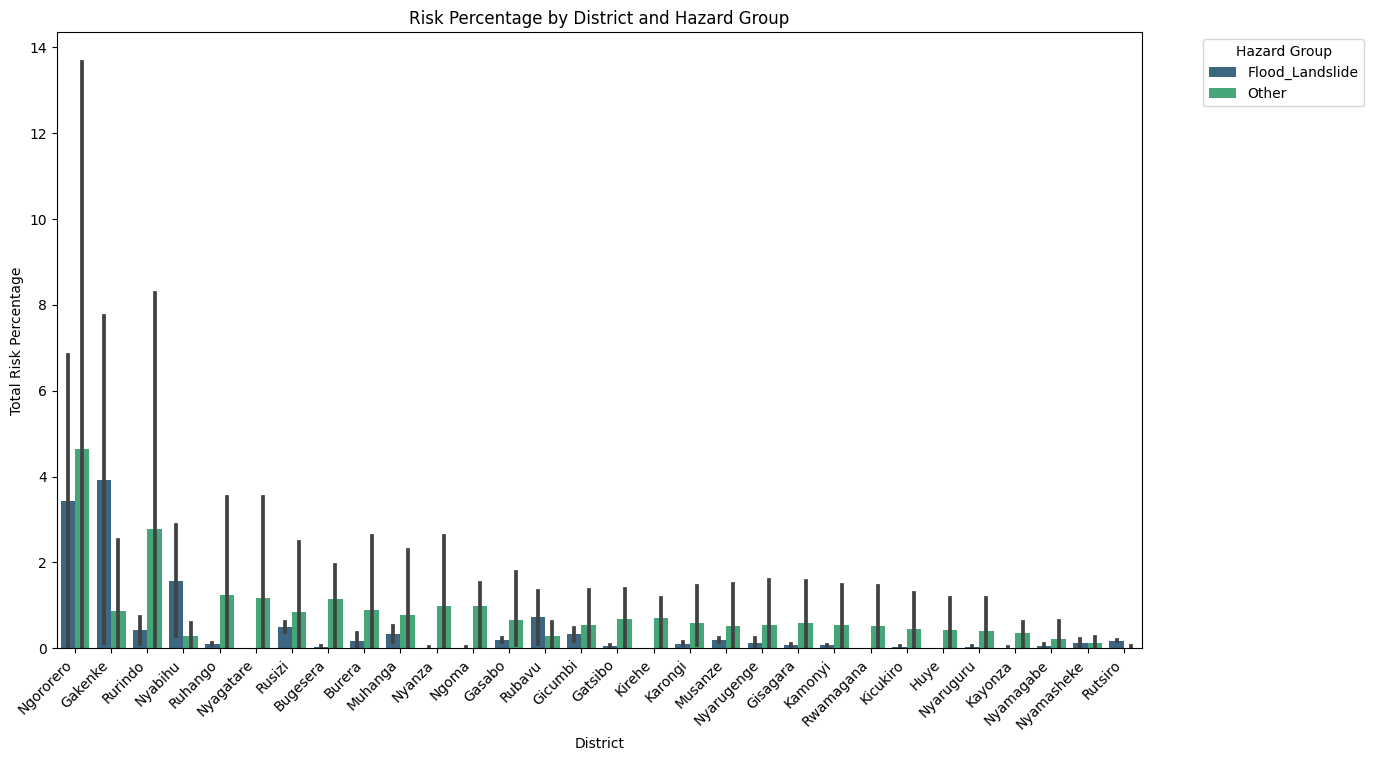

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = '/content/Multi_Hazard_Rwanda_2021.csv'
df = pd.read_csv(data)

# Display the original data
print("Original Data:")
print(df.head())

# Calculate severity and likelihood for each district
# For simplicity, let's use the sum of 'Death_2021' and 'Damaged_House_2021' as severity
# and the count of hazards as likelihood
df['Severity'] = df['Death_2021'] + df['Damaged_House_2021']
df['Likelihood'] = df.groupby('District')['Hazard'].transform('count')

# Display the calculated severity and likelihood
print("\nCalculated Severity and Likelihood:")
print(df[['District', 'Hazard', 'Severity', 'Likelihood']])

# Group districts based on hazard types
flood_landslide_group = ['Flood', 'Landslide']
lightning_group = ['Lightning']
other_group = ['Rainstorm', 'Windstom']  # Assuming the remaining hazards fall into this group

# Assign groups based on hazard types
df['Group'] = np.where(df['Hazard'].isin(flood_landslide_group), 'Flood_Landslide',
                       np.where(df['Hazard'].isin(lightning_group), 'Lightning', 'Other'))

# Display the assigned groups
print("\nAssigned Groups:")
print(df[['District', 'Hazard', 'Group']])

# Calculate risk as the product of severity and likelihood
df['Risk'] = df['Severity'] * df['Likelihood']

# Display the calculated risk
print("\nCalculated Risk:")
print(df[['District', 'Hazard', 'Risk']])

# Prioritize groups based on total risk
group_prioritization = df.groupby('Group')['Risk'].sum().sort_values(ascending=False).index

# Display the prioritized groups
print("\nPrioritized Groups:")
print(group_prioritization)

# Calculate risk as a percentage of the total risk
df['Risk_Percentage'] = (df['Risk'] / df['Risk'].sum()) * 100

# Display the calculated risk percentage
print("\nCalculated Risk Percentage:")
print(df[['District', 'Hazard', 'Risk_Percentage']])

# Plotting
plt.figure(figsize=(14, 8))
sns.barplot(x='District', y='Risk_Percentage', hue='Group', data=df, palette='viridis', order=df.groupby('District')['Risk'].sum().sort_values(ascending=False).index)
plt.title('Risk Percentage by District and Hazard Group')
plt.xlabel('District')
plt.ylabel('Total Risk Percentage')
plt.legend(title='Hazard Group', bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.show()


Original Data:
  Province District     Hazard  Death_2021  Damaged_House_2021
0   Kigali   Gasabo      Flood           7                   5
1   Kigali   Gasabo  Landslide          12                   8
2   Kigali   Gasabo  Rainstorm           2                 149
3   Kigali   Gasabo   Windstom           0                  13
4   Kigali   Gasabo  Lightenin           3                   3

Calculated Severity and Likelihood:
    District     Hazard  Severity  Likelihood
0     Gasabo      Flood        12           5
1     Gasabo  Landslide        20           5
2     Gasabo  Rainstorm       151           5
3     Gasabo   Windstom        13           5
4     Gasabo  Lightenin         6           5
..       ...        ...       ...         ...
145    Ngoma      Flood         0           5
146    Ngoma  Landslide         3           5
147    Ngoma  Rainstorm       122           5
148    Ngoma   Windstom       131           5
149    Ngoma  Lightenin         0           5

[150 rows x 4 col

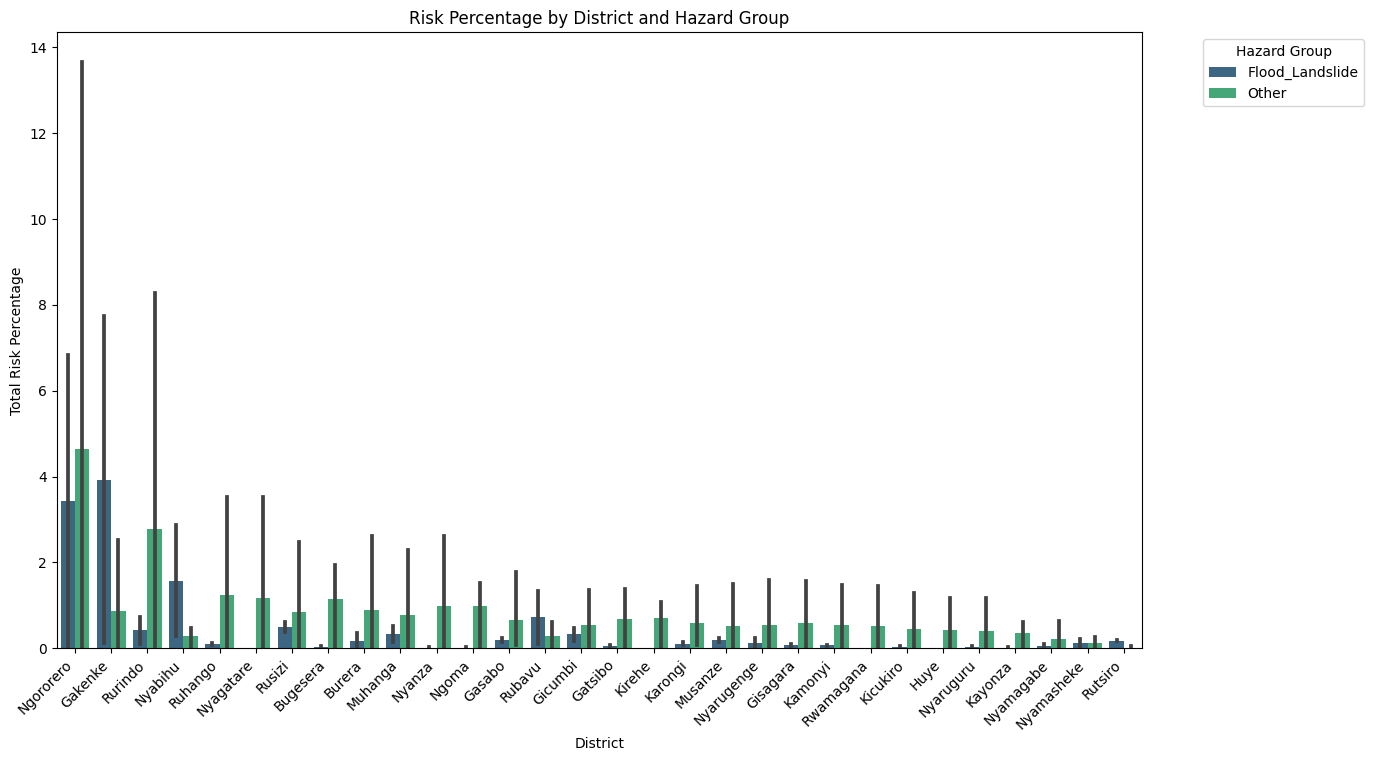

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = '/content/Multi_Hazard_Rwanda_2021.csv'
df = pd.read_csv(data)

# Display the original data
print("Original Data:")
print(df.head())

# Calculate severity and likelihood for each district
# For simplicity, let's use the sum of 'Death_2021' and 'Damaged_House_2021' as severity
# and the count of hazards as likelihood
df['Severity'] = df['Death_2021'] + df['Damaged_House_2021']
df['Likelihood'] = df.groupby('District')['Hazard'].transform('count')

# Display the calculated severity and likelihood
print("\nCalculated Severity and Likelihood:")
print(df[['District', 'Hazard', 'Severity', 'Likelihood']])

# Group districts based on hazard types
flood_landslide_group = ['Flood', 'Landslide']
lightning_group = ['Lightning']
other_group = ['Rainstorm', 'Windstom']  # Assuming the remaining hazards fall into this group

# Assign groups based on hazard types
df['Group'] = np.where(df['Hazard'].isin(flood_landslide_group), 'Flood_Landslide',
                       np.where(df['Hazard'].isin(lightning_group), 'Lightning', 'Other'))

# Display the assigned groups
print("\nAssigned Groups:")
print(df[['District', 'Hazard', 'Group']])

# Calculate risk as the product of severity and likelihood
df['Risk'] = df['Severity'] * df['Likelihood']

# Display the calculated risk
print("\nCalculated Risk:")
print(df[['District', 'Hazard', 'Risk']])

# Prioritize groups based on total risk
group_prioritization = df.groupby('Group')['Risk'].sum().sort_values(ascending=False).index

# Display the prioritized groups
print("\nPrioritized Groups:")
print(group_prioritization)

# Calculate risk as a percentage of the total risk
df['Risk_Percentage'] = (df['Risk'] / df['Risk'].sum()) * 100

# Display the calculated risk percentage
print("\nCalculated Risk Percentage:")
print(df[['District', 'Hazard', 'Risk_Percentage']])

# Plotting
plt.figure(figsize=(14, 8))
sns.barplot(x='District', y='Risk_Percentage', hue='Group', data=df, palette='viridis', order=df.groupby('District')['Risk'].sum().sort_values(ascending=False).index)
plt.title('Risk Percentage by District and Hazard Group')
plt.xlabel('District')
plt.ylabel('Total Risk Percentage')
plt.legend(title='Hazard Group', bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.show()


#Criteria: Please note that the probabilities are based on the assumption that the impact of each hazard in a district contributes to the overall probability of that hazard in the province.

In [57]:
import pandas as pd

# Load the data
data = '/content/Multi_Hazard_Rwanda_2021.csv'
df = pd.read_csv(data)

# Calculate probability of each hazard in each district
df['Probability_Death'] = df['Death_2021'] / df.groupby('District')['Death_2021'].transform('sum')
df['Probability_Damaged_House'] = df['Damaged_House_2021'] / df.groupby('District')['Damaged_House_2021'].transform('sum')

# Calculate probability contribution of each hazard in each province
province_probs = df.groupby(['Province', 'Hazard'])[['Probability_Death', 'Probability_Damaged_House']].mean().reset_index()

# Print table with province, hazard, and probability contribution
print(province_probs)


    Province     Hazard  Probability_Death  Probability_Damaged_House
0    Eastern      Flood           0.101852                   0.004074
1    Eastern  Landslide           0.111111                   0.002147
2    Eastern  Lightenin           0.495370                   0.000000
3    Eastern  Rainstorm           0.291667                   0.547256
4    Eastern   Windstom           0.000000                   0.446523
5     Kigali      Flood           0.171296                   0.009363
6     Kigali  Landslide           0.436508                   0.054134
7     Kigali  Lightenin           0.041667                   0.005618
8     Kigali  Rainstorm           0.350529                   0.878019
9     Kigali   Windstom           0.000000                   0.052866
10  Northern      Flood           0.172903                   0.036040
11  Northern  Landslide           0.410185                   0.233102
12  Northern  Lightenin           0.156618                   0.002604
13  Northern  Rainst

#Visualization

#Patern variation

In [49]:
import pandas as pd

# Load data into a DataFrame
data = pd.read_csv("/content/Multi_Hazard_Rwanda_2021.csv")

# Now you can use groupby on the DataFrame
district_with_highest_deaths = data.groupby('District')['Death_2021'].sum().idxmax()
district_with_highest_damage = data.groupby('District')['Damaged_House_2021'].sum().idxmax()

# Print the results
print(f"District with the highest total deaths: {district_with_highest_deaths}")
print(f"District with the highest total damaged houses: {district_with_highest_damage}")


District with the highest total deaths: Nyabihu
District with the highest total damaged houses: Ngororero


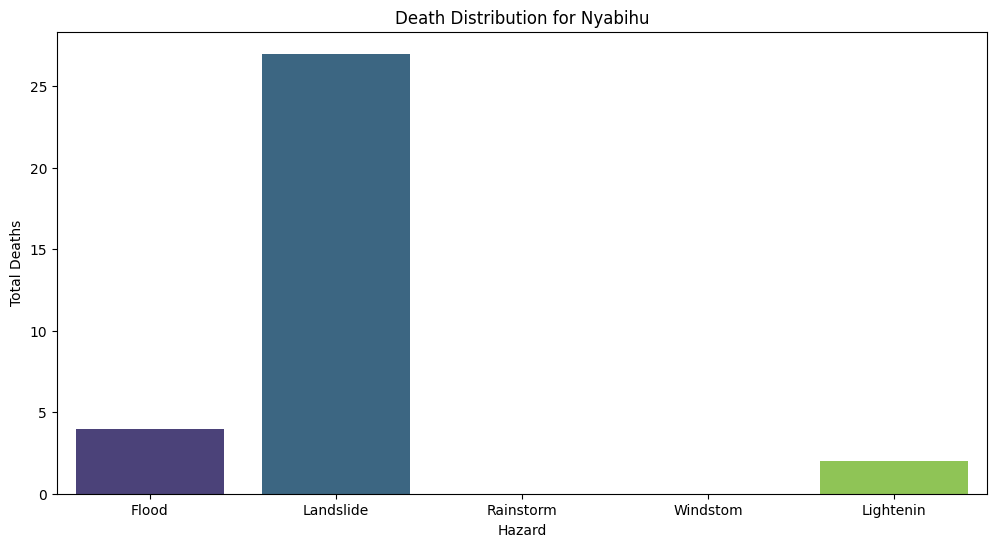

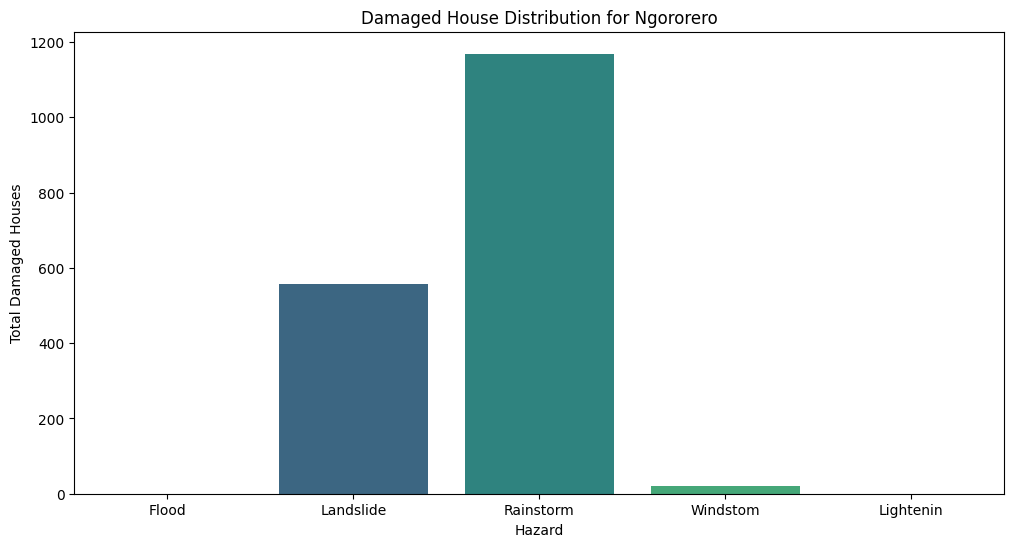

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for the district with the highest deaths
highest_death_data = data[data['District'] == district_with_highest_deaths]

# Filter data for the district with the highest damaged houses
highest_damage_data = data[data['District'] == district_with_highest_damage]

# Plot bar chart for deaths
plt.figure(figsize=(12, 6))
sns.barplot(x='Hazard', y='Death_2021', data=highest_death_data, palette='viridis')
plt.title(f'Death Distribution for {district_with_highest_deaths}')
plt.xlabel('Hazard')
plt.ylabel('Total Deaths')
plt.show()

# Plot bar chart for damaged houses
plt.figure(figsize=(12, 6))
sns.barplot(x='Hazard', y='Damaged_House_2021', data=highest_damage_data, palette='viridis')
plt.title(f'Damaged House Distribution for {district_with_highest_damage}')
plt.xlabel('Hazard')
plt.ylabel('Total Damaged Houses')
plt.show()


Insights for Ngororero:
Total Deaths: 32
Total Damaged Houses: 1746



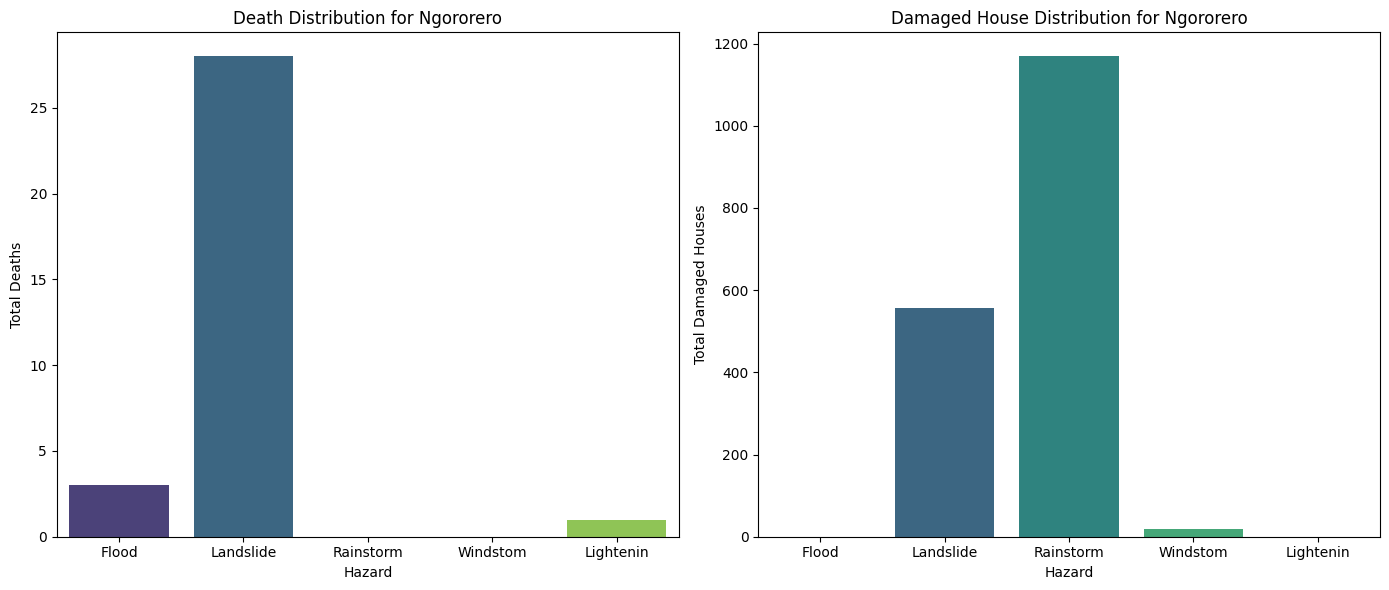

Insights for Gakenke:
Total Deaths: 27
Total Damaged Houses: 865



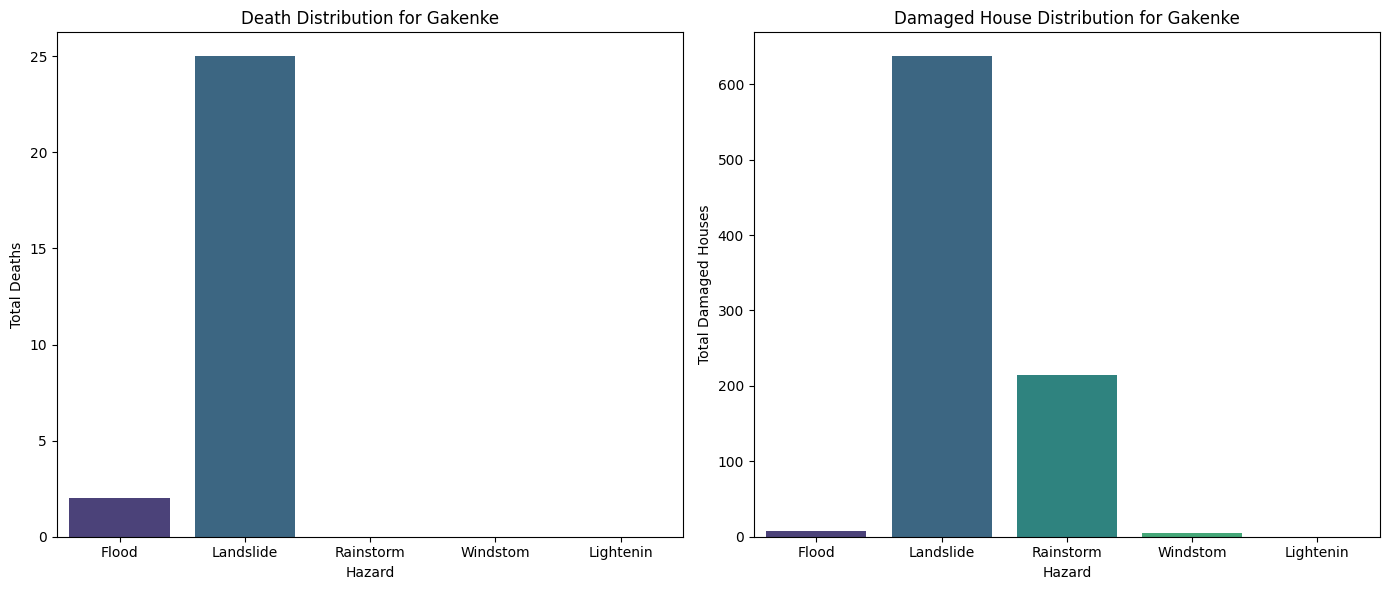

Insights for Rurindo:
Total Deaths: 17
Total Damaged Houses: 769



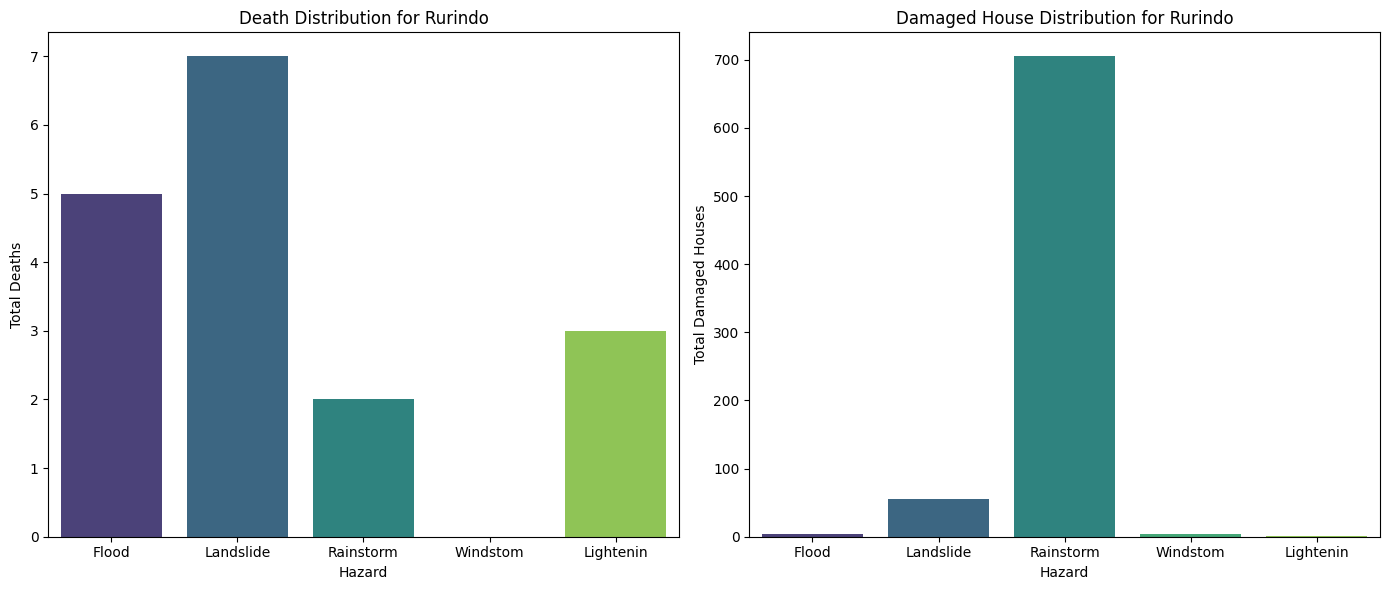

Insights for Nyabihu:
Total Deaths: 33
Total Damaged Houses: 311



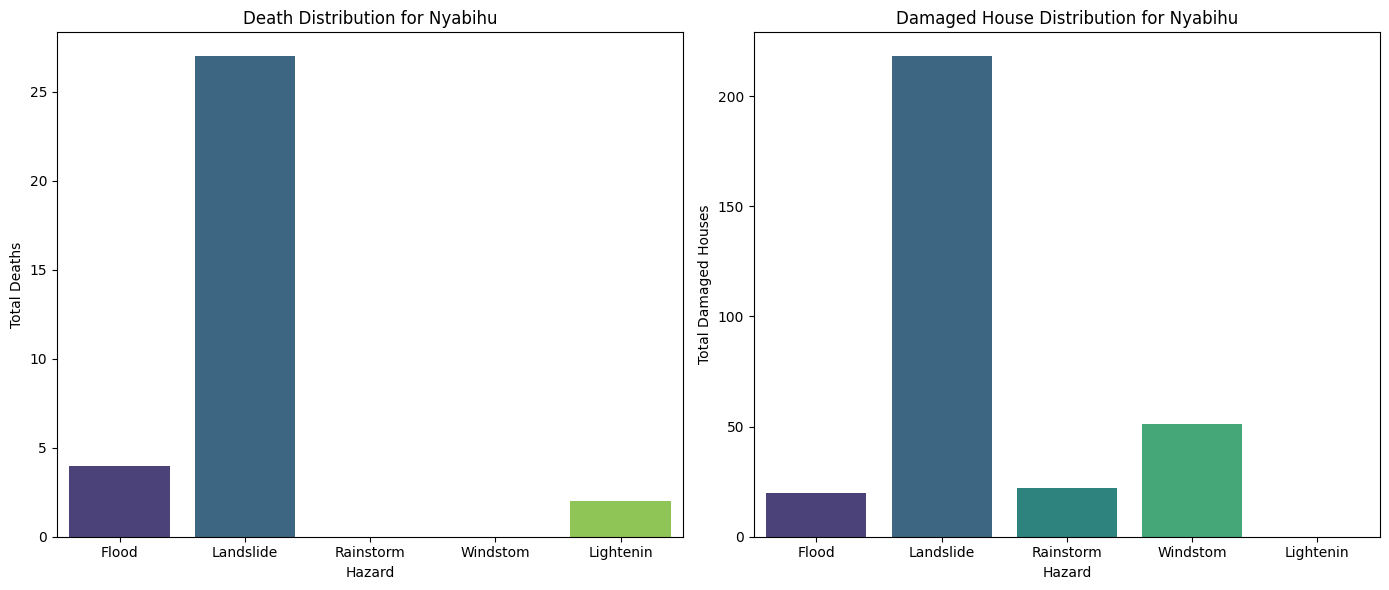

Insights for Ruhango:
Total Deaths: 8
Total Damaged Houses: 327



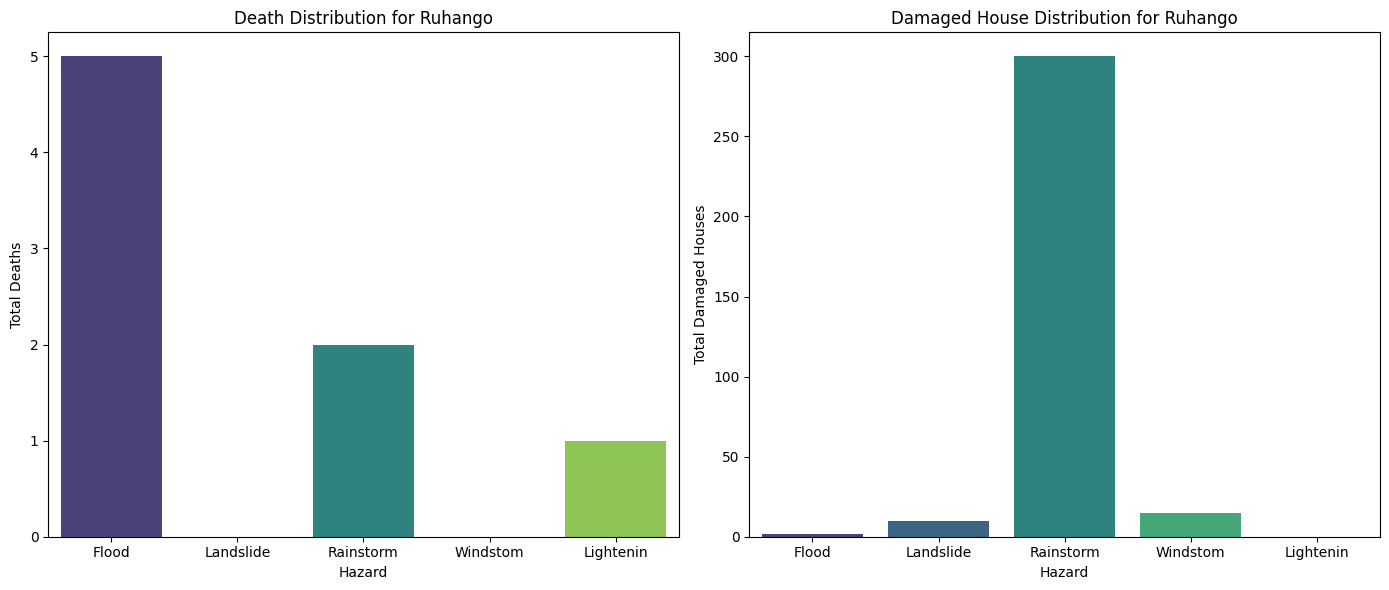

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate overall impact metric (e.g., sum of deaths and damaged houses)
data['Overall_Impact'] = data['Death_2021'] + data['Damaged_House_2021']

# Select the top five districts with high impact
top_districts = data.groupby('District')['Overall_Impact'].sum().nlargest(5).index

# Iterate through the top districts
for district in top_districts:
    district_data = data[data['District'] == district]

    # Provide insights
    print(f"Insights for {district}:")
    print(f"Total Deaths: {district_data['Death_2021'].sum()}")
    print(f"Total Damaged Houses: {district_data['Damaged_House_2021'].sum()}")
    print()

    # Plot bar charts for deaths and damaged houses side by side
    plt.figure(figsize=(14, 6))

    # Plot for deaths
    plt.subplot(1, 2, 1)
    sns.barplot(x='Hazard', y='Death_2021', data=district_data, palette='viridis')
    plt.title(f'Death Distribution for {district}')
    plt.xlabel('Hazard')
    plt.ylabel('Total Deaths')

    # Plot for damaged houses
    plt.subplot(1, 2, 2)
    sns.barplot(x='Hazard', y='Damaged_House_2021', data=district_data, palette='viridis')
    plt.title(f'Damaged House Distribution for {district}')
    plt.xlabel('Hazard')
    plt.ylabel('Total Damaged Houses')

    plt.tight_layout()
    plt.show()


In [51]:
# Calculate the probability of each hazard in each district
data['Probability_Death'] = data['Death_2021'] / data.groupby('District')['Death_2021'].transform('sum')
data['Probability_Damaged_House'] = data['Damaged_House_2021'] / data.groupby('District')['Damaged_House_2021'].transform('sum')

# Fill missing values with zeros
data[['Probability_Death', 'Probability_Damaged_House']] = data[['Probability_Death', 'Probability_Damaged_House']].fillna(0)

# Display the calculated probabilities
print(data[['District', 'Hazard', 'Probability_Death', 'Probability_Damaged_House']])


    District     Hazard  Probability_Death  Probability_Damaged_House
0     Gasabo      Flood           0.291667                   0.028090
1     Gasabo  Landslide           0.500000                   0.044944
2     Gasabo  Rainstorm           0.083333                   0.837079
3     Gasabo   Windstom           0.000000                   0.073034
4     Gasabo  Lightenin           0.125000                   0.016854
..       ...        ...                ...                        ...
145    Ngoma      Flood           0.000000                   0.000000
146    Ngoma  Landslide           0.000000                   0.011719
147    Ngoma  Rainstorm           0.000000                   0.476562
148    Ngoma   Windstom           0.000000                   0.511719
149    Ngoma  Lightenin           0.000000                   0.000000

[150 rows x 4 columns]


In [52]:
# Sort DataFrame based on Probability_Death and Probability_Damaged_House
sorted_data = data.sort_values(by=['Probability_Death', 'Probability_Damaged_House'], ascending=False)

# Select the top 7 districts with the highest probabilities
top_districts = sorted_data.groupby('District').agg({'Probability_Death': 'max', 'Probability_Damaged_House': 'max'}).nlargest(7, columns=['Probability_Death', 'Probability_Damaged_House']).reset_index()

# Save tables to a CSV file
sorted_data.to_csv('/content/sorted_data.csv', index=False)
top_districts.to_csv('/content/top_districts.csv', index=False)

# Display the sorted_data and top_districts DataFrames
print("Sorted Data based on Probability:")
print(sorted_data[['District', 'Hazard', 'Probability_Death', 'Probability_Damaged_House']])

print("\nTop 7 Districts with Highest Probabilities:")
print(top_districts)


Sorted Data based on Probability:
      District     Hazard  Probability_Death  Probability_Damaged_House
24        Huye  Lightenin           1.000000                   0.009434
119   Bugesera  Lightenin           1.000000                   0.000000
134     Kirehe  Lightenin           1.000000                   0.000000
142  Nyagatare  Rainstorm           1.000000                   0.000000
96     Gakenke  Landslide           0.925926                   0.736416
..         ...        ...                ...                        ...
136  Rwamagana  Landslide           0.000000                   0.000000
140  Nyagatare      Flood           0.000000                   0.000000
144  Nyagatare  Lightenin           0.000000                   0.000000
145      Ngoma      Flood           0.000000                   0.000000
149      Ngoma  Lightenin           0.000000                   0.000000

[150 rows x 4 columns]

Top 7 Districts with Highest Probabilities:
    District  Probability_Death  

In [53]:
import pandas as pd
import numpy as np

# Load the data
data = '/content/Multi_Hazard_Rwanda_2021.csv'
df = pd.read_csv(data)

# Generate random 'Severity' and 'Likelihood' values for illustration purposes
np.random.seed(42)
df['Severity'] = np.random.choice([1, 2, 3, 4, 5], size=len(df))
df['Likelihood'] = np.random.choice([1, 2, 3, 4, 5], size=len(df))

# Now you can proceed with the risk assessment
# ...

# Display the updated DataFrame
print(df[['Hazard', 'Severity', 'Likelihood', 'Risk_Score', 'Risk_Level']])


KeyError: ignored

    District     Hazard  Probability_Death  Probability_Damaged_House
0     Gasabo      Flood           0.291667                   0.028090
1     Gasabo  Landslide           0.500000                   0.044944
2     Gasabo  Rainstorm           0.083333                   0.837079
3     Gasabo   Windstom           0.000000                   0.073034
4     Gasabo  Lightenin           0.125000                   0.016854
..       ...        ...                ...                        ...
145    Ngoma      Flood           0.000000                   0.000000
146    Ngoma  Landslide           0.000000                   0.011719
147    Ngoma  Rainstorm           0.000000                   0.476562
148    Ngoma   Windstom           0.000000                   0.511719
149    Ngoma  Lightenin           0.000000                   0.000000

[150 rows x 4 columns]


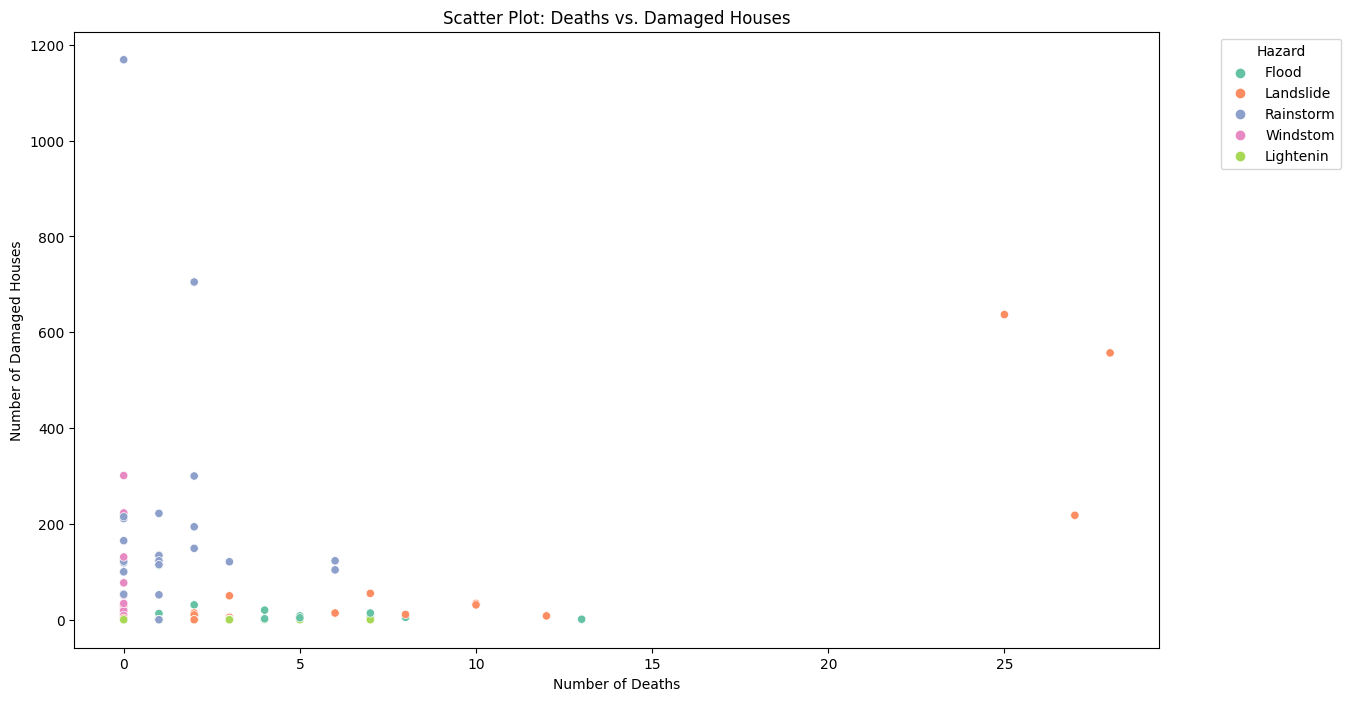

<ipython-input-41-6129f4f9c24c>:35: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Province', y='Death_2021', data=df, hue='Hazard', ci=None)


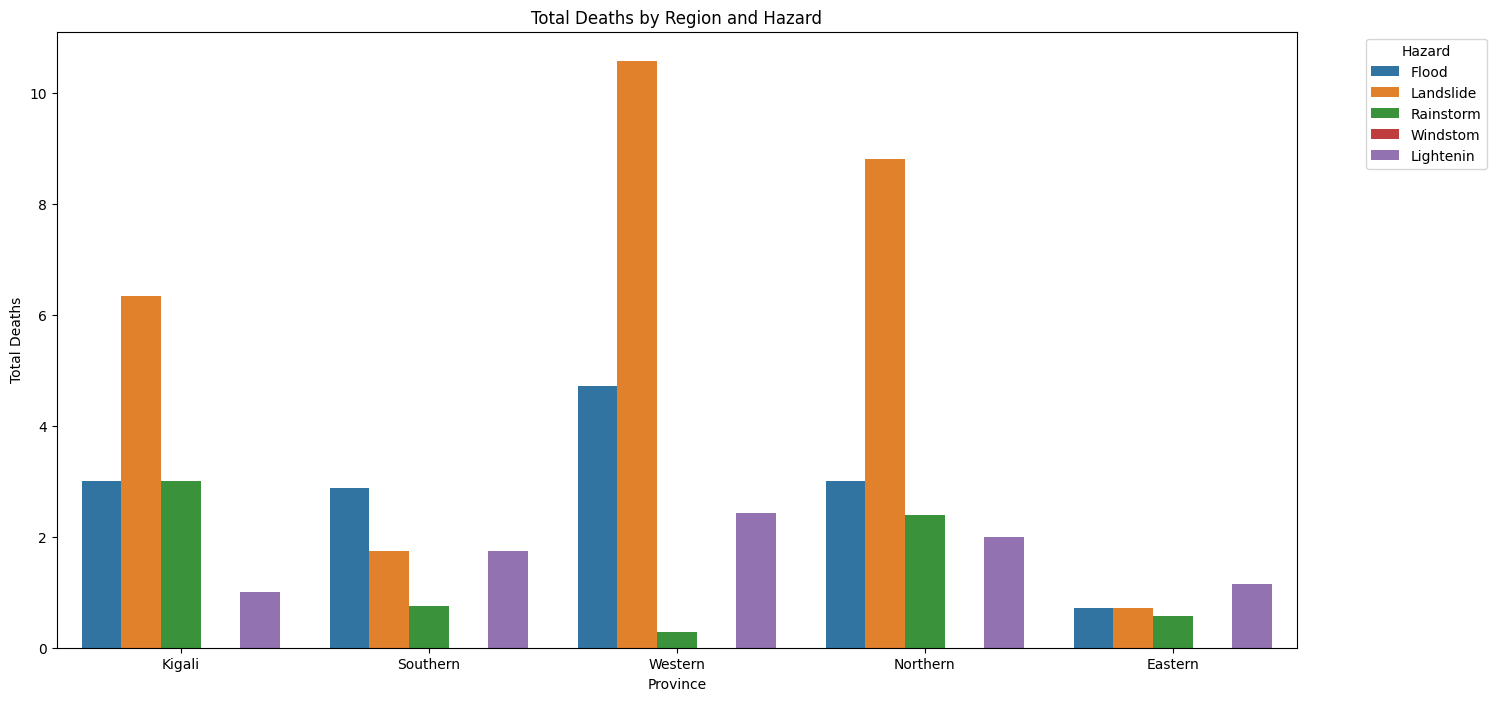

<ipython-input-41-6129f4f9c24c>:43: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Province', y='Damaged_House_2021', data=df, hue='Hazard', ci=None)


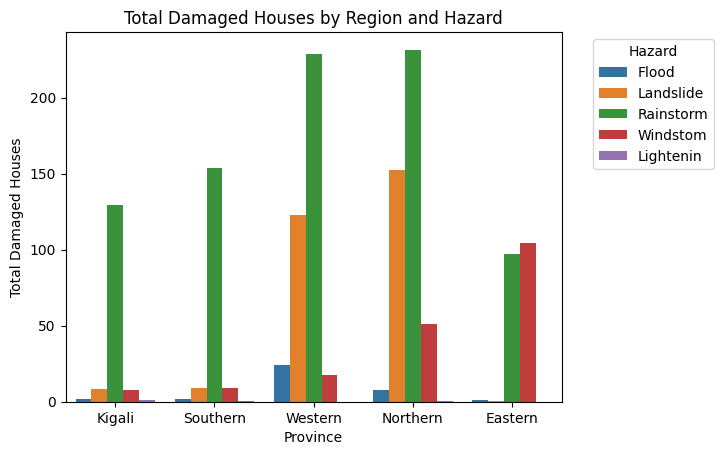

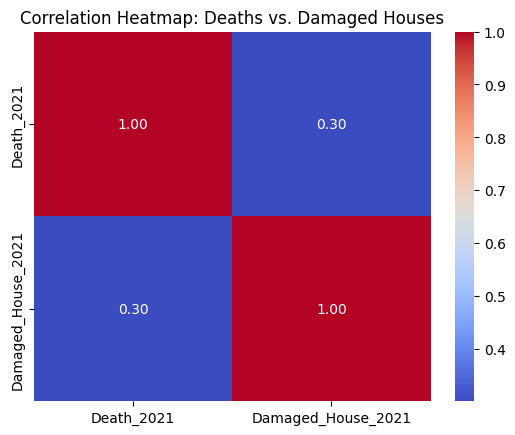

KeyError: ignored

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = '/content/Multi_Hazard_Rwanda_2021.csv'
df = pd.read_csv(data)

# Calculate the probability of each hazard in each district
df['Probability_Death'] = df['Death_2021'] / df.groupby('District')['Death_2021'].transform('sum')
df['Probability_Damaged_House'] = df['Damaged_House_2021'] / df.groupby('District')['Damaged_House_2021'].transform('sum')

# Fill missing values with zeros
df[['Probability_Death', 'Probability_Damaged_House']] = df[['Probability_Death', 'Probability_Damaged_House']].fillna(0)

# Display the calculated probabilities
print(df[['District', 'Hazard', 'Probability_Death', 'Probability_Damaged_House']])

# Visualize trends and correlations
plt.figure(figsize=(14, 8))

# Scatter plot for deaths vs. house damage
sns.scatterplot(x='Death_2021', y='Damaged_House_2021', hue='Hazard', data=df, palette='Set2')
plt.title('Scatter Plot: Deaths vs. Damaged Houses')
plt.xlabel('Number of Deaths')
plt.ylabel('Number of Damaged Houses')
plt.legend(title='Hazard', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

# Explore regional variations in the impact of various hazards
plt.figure(figsize=(16, 8))

# Bar plot for total deaths and house damage by region
sns.barplot(x='Province', y='Death_2021', data=df, hue='Hazard', ci=None)
plt.title('Total Deaths by Region and Hazard')
plt.xlabel('Province')
plt.ylabel('Total Deaths')
plt.legend(title='Hazard', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

sns.barplot(x='Province', y='Damaged_House_2021', data=df, hue='Hazard', ci=None)
plt.title('Total Damaged Houses by Region and Hazard')
plt.xlabel('Province')
plt.ylabel('Total Damaged Houses')
plt.legend(title='Hazard', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

# Correlation heatmap
correlation_matrix = df[['Death_2021', 'Damaged_House_2021']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap: Deaths vs. Damaged Houses')
plt.show()

# Risk assessment using severity and likelihood
# Assuming you have columns 'Severity' and 'Likelihood' in your DataFrame
severity_weights = {1: 1, 2: 2, 3: 3, 4: 4, 5: 5}
likelihood_weights = {1: 1, 2: 2, 3: 3, 4: 4, 5: 5}

# Calculate risk scores
df['Risk_Score'] = df['Severity'].map(severity_weights) * df['Likelihood'].map(likelihood_weights)

# Define risk levels based on total risk score (adjust thresholds as needed)
def assess_risk(risk_score):
    if risk_score <= 5:
        return 'Low'
    elif 5 < risk_score <= 10:
        return 'Medium'
    else:
        return 'High'

# Apply risk assessment to each row
df['Risk_Level'] = df['Risk_Score'].apply(assess_risk)

# Display the updated DataFrame
print(df[['Hazard', 'Severity', 'Likelihood', 'Risk_Score', 'Risk_Level']])


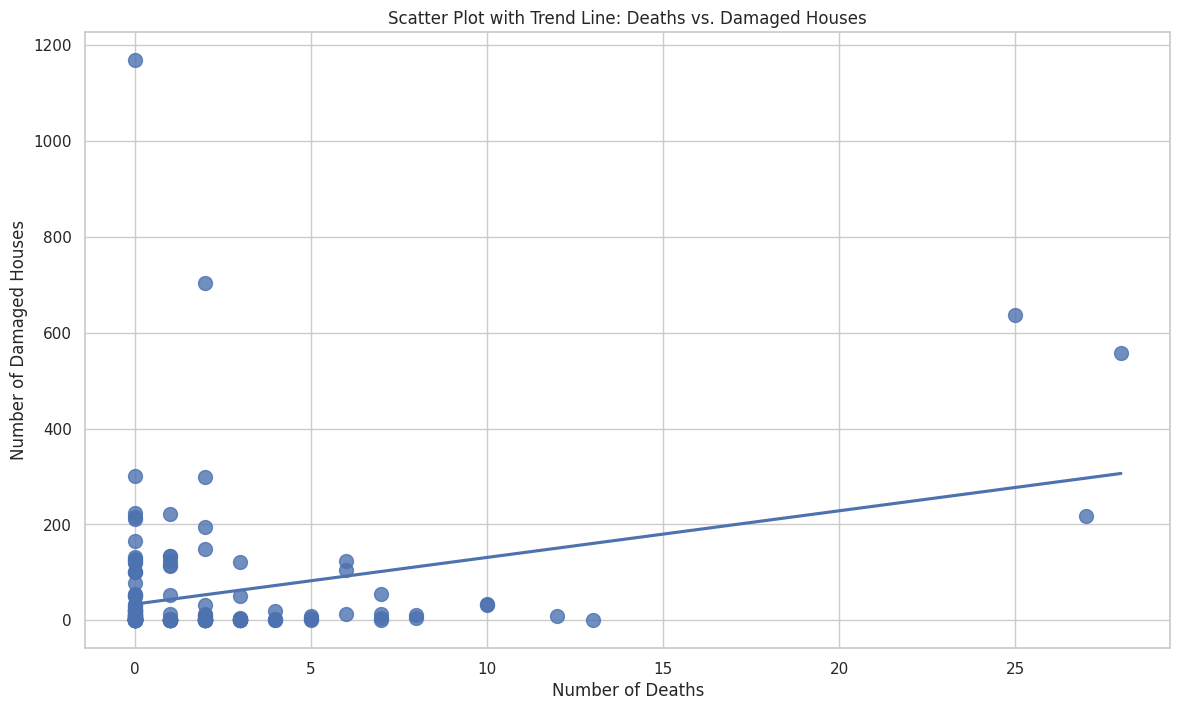

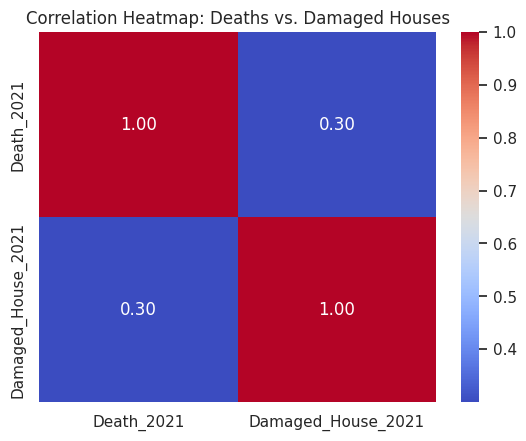

    District     Hazard  Probability_Death  Probability_Damaged_House  \
0     Gasabo      Flood           0.291667                   0.028090   
1     Gasabo  Landslide           0.500000                   0.044944   
2     Gasabo  Rainstorm           0.083333                   0.837079   
3     Gasabo   Windstom           0.000000                   0.073034   
4     Gasabo  Lightenin           0.125000                   0.016854   
..       ...        ...                ...                        ...   
145    Ngoma      Flood                NaN                   0.000000   
146    Ngoma  Landslide                NaN                   0.011719   
147    Ngoma  Rainstorm                NaN                   0.476562   
148    Ngoma   Windstom                NaN                   0.511719   
149    Ngoma  Lightenin                NaN                   0.000000   

     Risk_Score Risk_Level  
0             4        Low  
1             5        Low  
2             3        Low  
3      

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = '/content/Multi_Hazard_Rwanda_2021.csv'
df = pd.read_csv(data)

# Assume you have some criteria for determining severity and likelihood,
# let's create dummy values for illustration purposes
np.random.seed(42)
df['Severity'] = np.random.choice(['Very Low', 'Low', 'Medium', 'High', 'Very High'], size=len(df))
df['Likelihood'] = np.random.choice(['Very Low', 'Low', 'Medium', 'High', 'Very High'], size=len(df))

# Calculate the probability of each hazard in each district
df['Probability_Death'] = df['Death_2021'] / df.groupby('District')['Death_2021'].transform('sum')
df['Probability_Damaged_House'] = df['Damaged_House_2021'] / df.groupby('District')['Damaged_House_2021'].transform('sum')

# Visualize trends and correlations
plt.figure(figsize=(14, 8))

# Scatter plot for deaths vs. house damage with trend line
sns.regplot(x='Death_2021', y='Damaged_House_2021', data=df, scatter_kws={'s': 100}, ci=None)
plt.title('Scatter Plot with Trend Line: Deaths vs. Damaged Houses')
plt.xlabel('Number of Deaths')
plt.ylabel('Number of Damaged Houses')

plt.show()

# Correlation heatmap
correlation_matrix = df[['Death_2021', 'Damaged_House_2021']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap: Deaths vs. Damaged Houses')
plt.show()

# Assess risk based on severity and likelihood
severity_weights = {'Very Low': 1, 'Low': 2, 'Medium': 3, 'High': 4, 'Very High': 5}
likelihood_weights = {'Very Low': 1, 'Low': 2, 'Medium': 3, 'High': 4, 'Very High': 5}

# Calculate risk scores
df['Risk_Score'] = df['Severity'].map(severity_weights) * df['Likelihood'].map(likelihood_weights)

# Define risk levels based on total risk score (adjust thresholds as needed)
def assess_risk(risk_score):
    if risk_score <= 5:
        return 'Low'
    elif 5 < risk_score <= 10:
        return 'Medium'
    else:
        return 'High'

# Apply risk assessment to each row
df['Risk_Level'] = df['Risk_Score'].apply(assess_risk)

# Display the updated DataFrame with probability, trends, and risk assessment
print(df[['District', 'Hazard', 'Probability_Death', 'Probability_Damaged_House', 'Risk_Score', 'Risk_Level']])
#Save




In [1]:
# Select seven districts with high risk of landslides and floods
high_risk_landslide_flood = df[df['Risk_Level'].isin(['High']) & df['Hazard'].isin(['Landslide', 'Flood'])].head(7)

# Select seven districts with high risk of other hazards
high_risk_other_hazards = df[df['Risk_Level'].isin(['High']) & ~df['Hazard'].isin(['Landslide', 'Flood'])].head(7)

# Display the selected districts
print("Seven districts with high risk of landslides and floods:")
print(high_risk_landslide_flood[['District', 'Risk_Level']])

print("\nSeven districts with high risk of other hazards:")
print(high_risk_other_hazards[['District', 'Risk_Level']])


NameError: ignored